<a href="https://colab.research.google.com/github/mkaanmolla/Australia_Rain_Prediction/blob/main/AustraliaRainPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data set
The data set was taken from the website “Kaggle” and consists of 145,000 rows and 23 columns in total. The relevant dataset contains 10 years of weather observations from many places in Australia. Since humidity, wind direction, temperature and similar parameters play an important role in meteorological forecasting, a lot of space is reserved for these and similar parameters. The problem in the study is to try to predict the "RainTomorrow" variable in the data set. All the variables in the dataset are listed below: </br></br>
• Date: Date in Year/Month/Day format </br>
• Location: City</br>
• MinTemp: Minimum temperature</br>
• MaxTemp: Maximum temperature</br>
• Rainfall: Rainfall</br>
• Evaporation: Evaporation</br>
• Sunshine: Sunshine</br>
• WindGustDir: Wind direction</br>
• WindDir9am: Wind direction at 09:00 AM</br>
• WindDir3pm: Wind direction at 03:00 PM</br>
• WindSpeed9am: Wind speed at 09:00 am</br>
• WindSpeed3pm: Wind speed at 03:00 in the afternoon</br>
• Humidity9am: Humidity at 09:00 am</br>
• Humidity3pm: Humidity at 03:00 in the afternoon</br>
• Pressure9am: Pressure at 09:00 am</br>
• Pressure3pm: Pressure at 03:00 in the afternoon</br>
• Cloud9am: Cloud at 09:00 am</br>
• Cloud3pm: Cloud at 03:00 PM</br>
• Temp9am: Temperature at 09:00 am</br>
• Temp3pm: Temperature at 03:00 in the afternoon</br>
• RainToday: Whether it's raining today</br>
• RainTomorrow: Whether it will rain tomorrow

In [ ]:
import pandas as pd



In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


#Data Preprocessing
It is essential to perform this process in order to understand the data and obtain more positive results. In this data set, the data specified with "NA" has been converted to "0" in integer type.

In [ ]:
import io

#Reading CSV File
df = pd.read_csv(io.BytesIO(data_to_load['weatherAUS.csv']))


# NA to "0"
df = df.fillna(df.mode().iloc[0])

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


The categorical values ​​in the data set were converted to integer type values. For example, the "RainToday" property previously took the values ​​"Yes" and "No", but after this conversion, it took the values ​​"1" and "0". The same operations were performed for the “WindGustDir”, “WindDir9am”, “WindDir3pm” and “RainTomorrow” properties.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.0,0.0,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,4.0,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.0,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,4.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,4.0,0.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


#Data Visualization
Data visualization is the graphical presentation of data. Data visualization process; It includes the process of producing and obtaining images by transmitting the relationships between certain data to graphical display tools.
In this process, a systematic mapping between graphic signs and data values ​​is used and visuals are created based on them. These matches determine how the data values ​​are represented visually. In addition, chart markers (size, color, etc.) determine how and to what extent changes in data values ​​change. Within the scope of this project, three methods are used to visualize the data.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


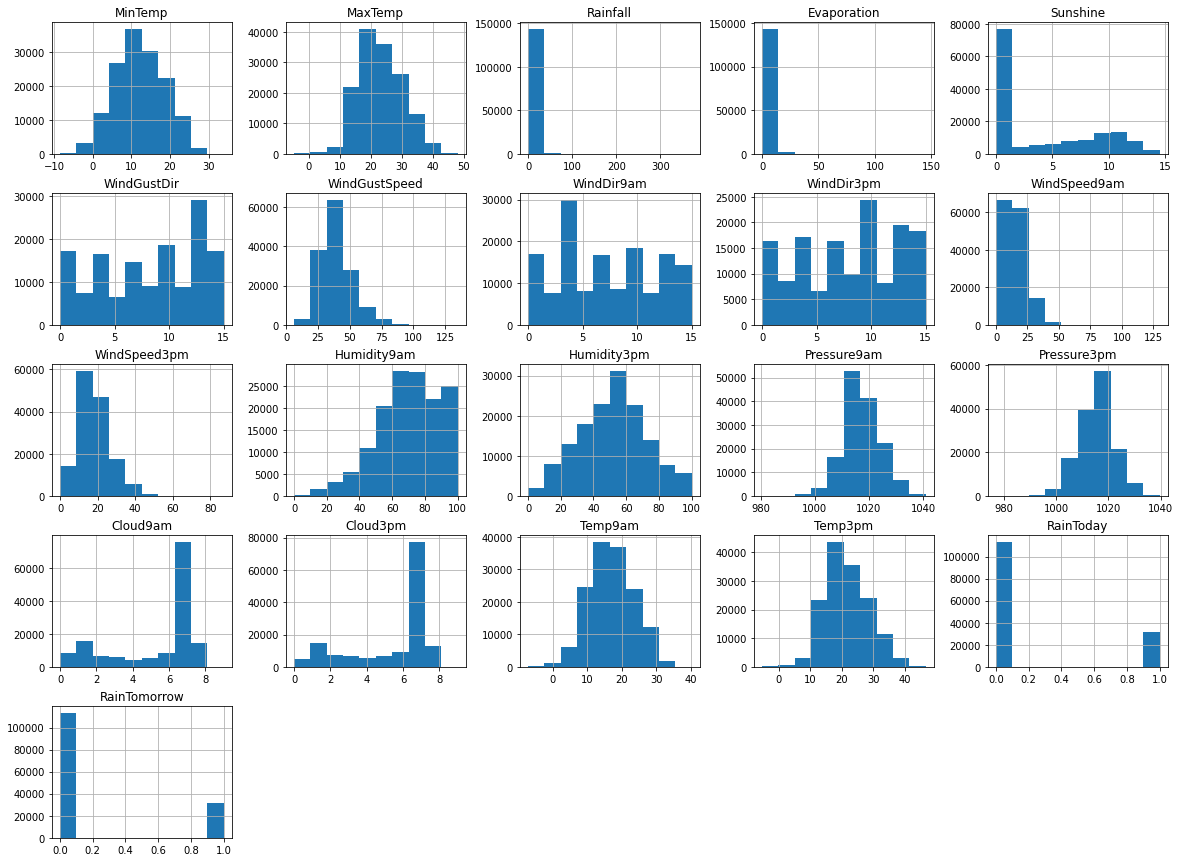

In [ ]:
#Histogram
import seaborn as sns 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
df = df.drop(['Date','Location'],axis=1)



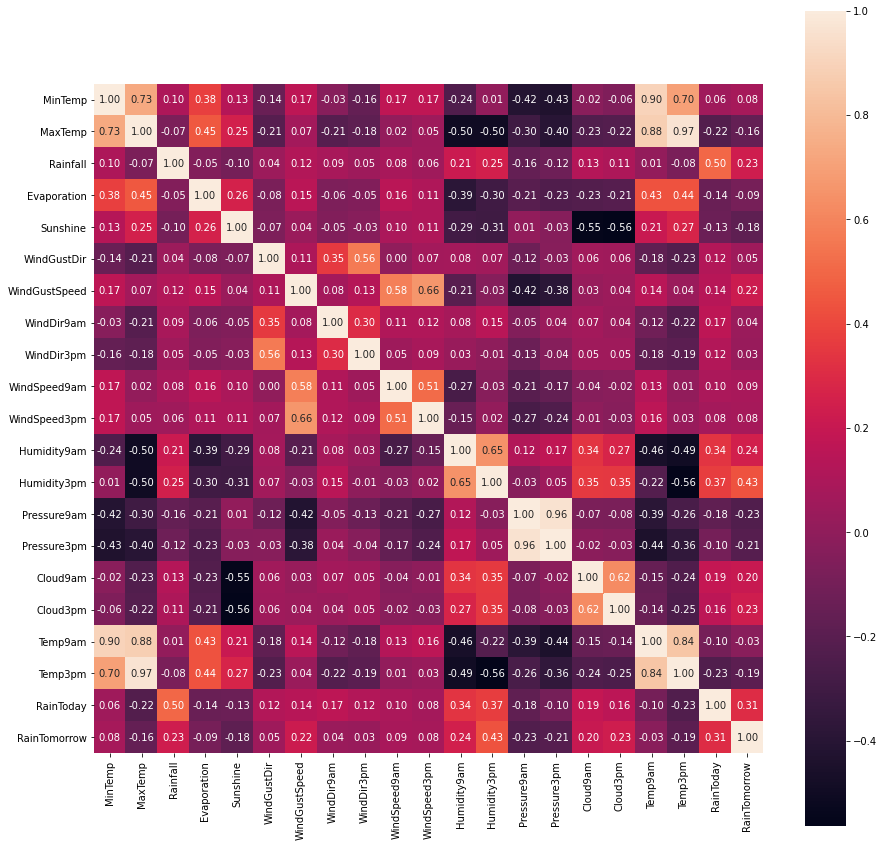

In [ ]:
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df))

colum_name = df.columns
df_scale.columns = colum_name
df_scale['RainTomorrow'] = le.fit_transform(df_scale['RainTomorrow'])
df_scale['RainToday'] = le.fit_transform(df_scale['RainToday'])

#Correlation Graph
plt.figure(figsize=(15,15))
ax = sns.heatmap(df_scale.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()


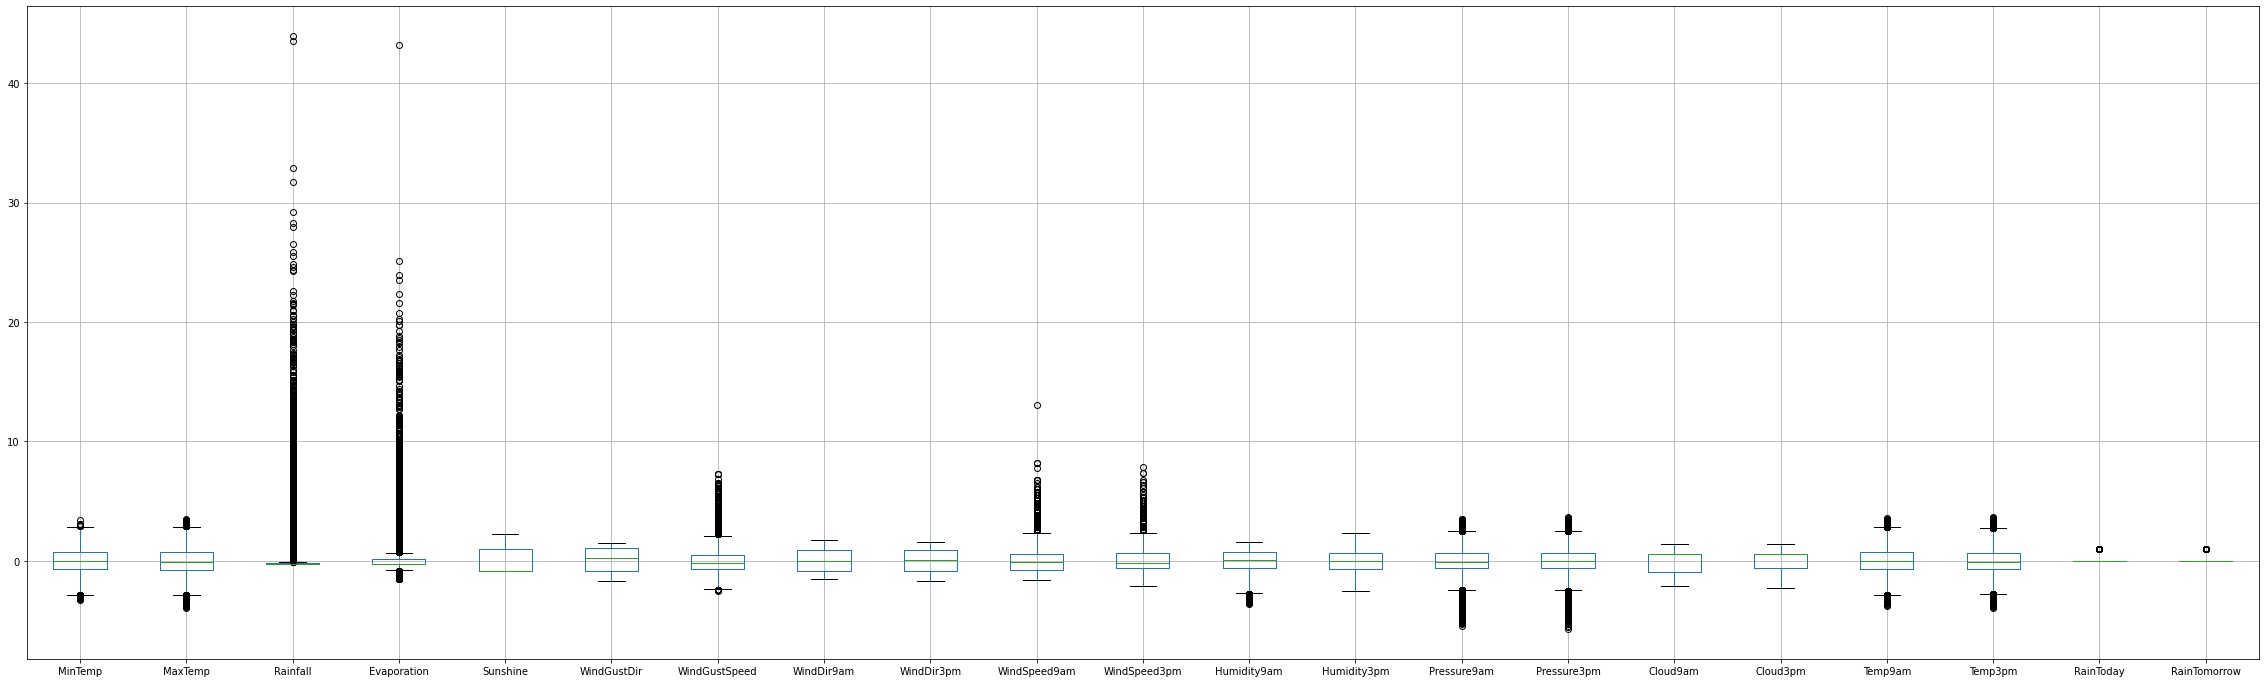

In [ ]:
#Boxplot
boxplot = df_scale.boxplot(figsize=(40, 12))

#Machine Learning Algorithms
**1-Random Forest:** It is a flexible, easy-to-use machine learning algorithm that produces a great result most of the time, even without hyperparameter tuning. It is also one of the most used algorithms because it can be used for both simplicity and classification and regression tasks. Random Forest is a supervised learning algorithm. As the name suggests anyway, it creates a forest and does it somehow randomly. The "forest" he built is a collection of decision trees that are mostly trained by the "bagging" method. The general idea of ​​the bagging method is that a combination of learning patterns increases the overall outcome. A big advantage of the random forest is that it can be used for both classification and regression problems that make up most current machine learning systems. 25% of the whole data set is reserved as train and the value of “random_state” is determined as “35”. In the first trial, the measurement was made with an accuracy of 85.55%. A total of 36365 predictions were made, of which 27160 are true negative and 3950 true positive values.

In [ ]:
X = df_scale.drop(['RainTomorrow'],axis=1)
y = df_scale['RainTomorrow']

from sklearn.model_selection import train_test_split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size = 0.25, random_state = 35)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
model = RandomForestClassifier()
model.fit(X_train_s, y_train_s)




RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.8554929190155369


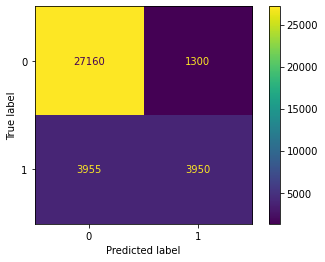

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_s = model.predict(X_test_s)
print("Accuracy: "+str(accuracy_score(y_pred_s,y_test_s)))

cm=confusion_matrix(y_test_s, y_pred_s)
#(tn, fp, fn, tp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(values_format='d');

**2-Logistic Regression:**It is a regression problem in which the dependent variable is a categorical variable. It is widely used in linear classification problems. Although it is called regression, there is a classification here. Logistic regression is a statistical method used to analyze a dataset with one or more independent variables that determine an outcome. The outcome is measured with a binary variable (there are only two possible outcomes). The code of the logistic regression algorithm used in the project is given below. In the first trial, the measurement was made with an accuracy of 84.22%. A total of 36365 predictions were made, of which 26945 are true negative and 3682 true positive values.

Accuracy: 0.8422109170906091


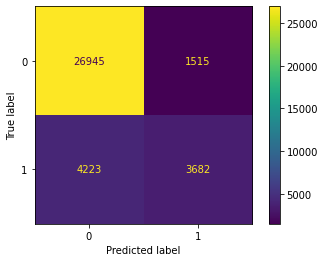

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train_s, y_train_s)
y_pred_s=model.predict(X_test_s)

print("Accuracy: "+str(accuracy_score(y_pred_s,y_test_s)))

cm=confusion_matrix(y_test_s, y_pred_s)
#(tn, fp, fn, tp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(values_format='d');

**3-Support Vector Machines:** Support Vector Machines are one of the supervised learning methods generally used in classification problems. Draws a line to separate points placed on a plane. It aims to have this line at the maximum distance for the points of both classes. It is suitable for complex but small to medium datasets. Besides performing linear classification, SVMs can efficiently perform nonlinear classification using so-called kernel numbers and implicitly map their inputs to higher-dimensional feature spaces. The code of the Support Vector Machines algorithm used in the project is given below. In the first trial, the measurement was made with an accuracy of 85.25%. A total of 36365 predictions were made, of which 27406 were true negative and 3597 were true positive values.

Accuracy: 0.8525505293551492


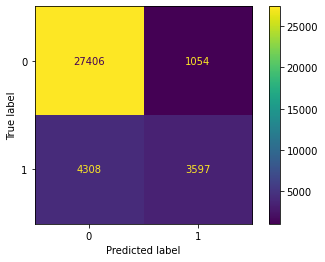

In [ ]:
from sklearn.svm import SVC
model = SVC(gamma="auto")
model.fit(X_train_s, y_train_s)
y_pred_s = model.predict(X_test_s)

print("Accuracy: "+str(accuracy_score(y_pred_s,y_test_s)))

cm=confusion_matrix(y_test_s, y_pred_s)
#(tn, fp, fn, tp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(values_format='d');


#Increase Sensitivity
Outliers in the data set should be cleaned in order to increase the sensitivity of the results of the algorithms we teach and to produce healthier results. For this reason, a function code was written as shown in Figure 14 to delete the outliers, the features were scaled, and the box plots were drawn again as seen in Figure 15 after this function was called. As a result, there was a significant decrease in outliers and the algorithms were found to be suitable for retesting.

In [ ]:
import numpy as np
def drop_outliers(df,field_name):
    iqr = 1.5 * (np.percentile(df[field_name],75) - np.percentile(df[field_name],25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index , inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25))].index , inplace=True)
df_scale.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

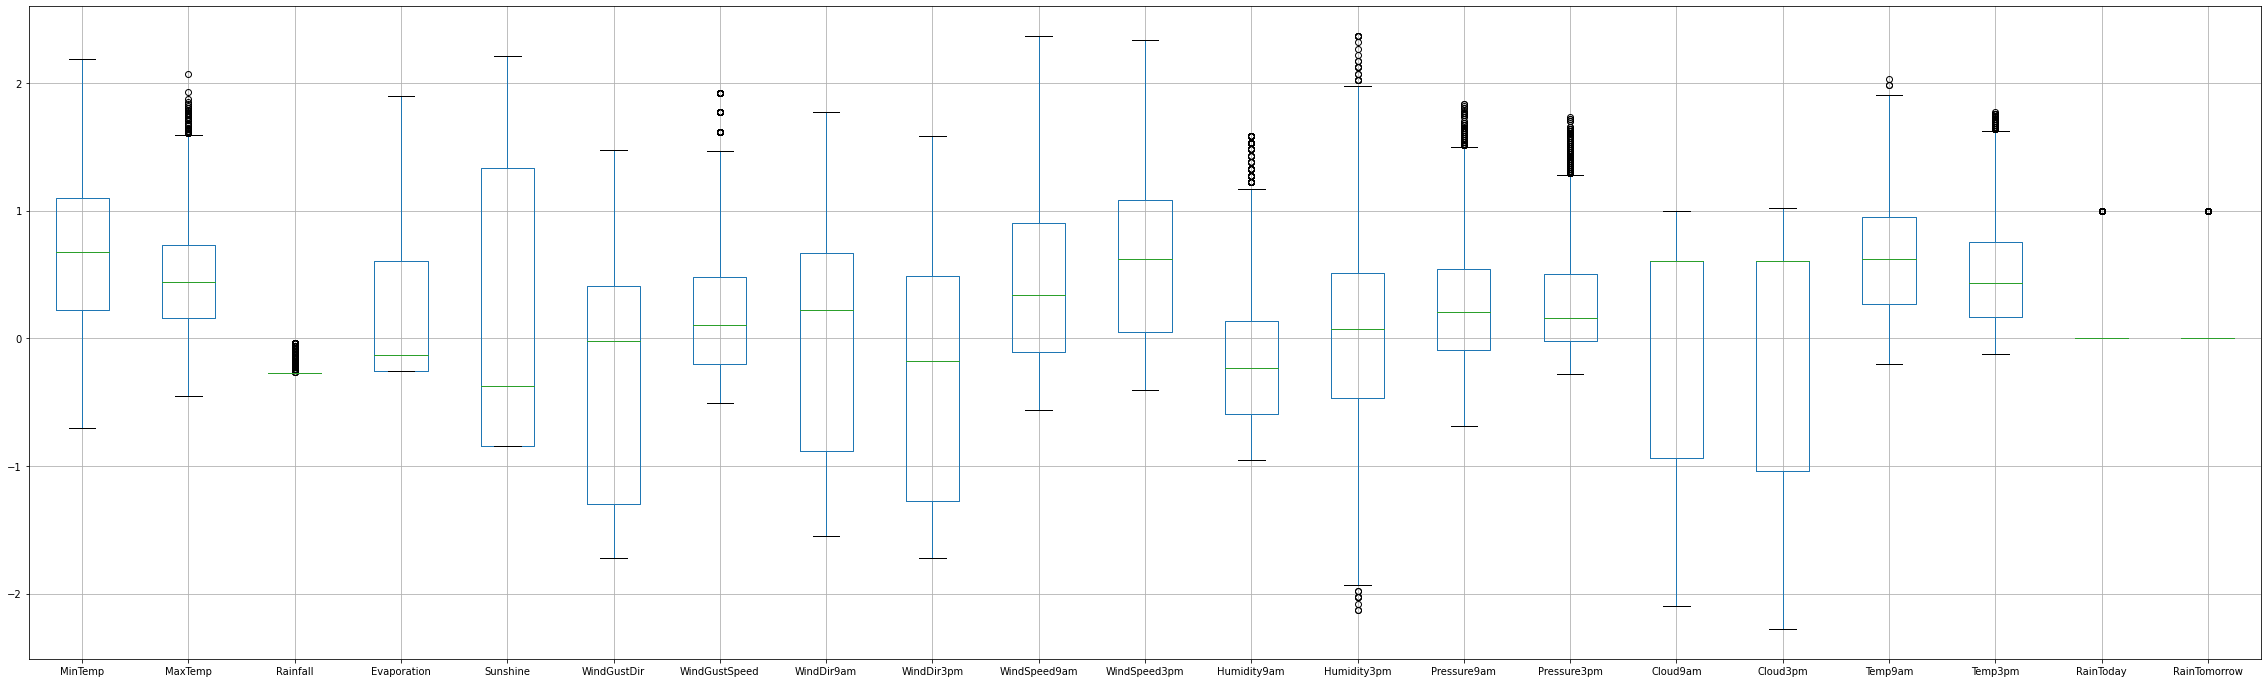

In [ ]:
drop_outliers(df_scale,'MinTemp')
drop_outliers(df_scale,'Rainfall')
drop_outliers(df_scale,'Evaporation')
drop_outliers(df_scale,'WindGustSpeed')
drop_outliers(df_scale,'WindSpeed9am')
drop_outliers(df_scale,'WindSpeed3pm')
drop_outliers(df_scale,'Humidity9am')
drop_outliers(df_scale,'Pressure9am')
drop_outliers(df_scale,'Pressure3pm')
drop_outliers(df_scale,'Temp9am')
drop_outliers(df_scale,'Temp3pm')

#BoxPlot Obtained as a Result of Reducing Outliers
boxplot = df_scale.boxplot(figsize=(40, 12))

In [ ]:
df_scale.shape

(7839, 21)

#Improved Test
After improvements were made on the data set to increase sensitivity, the calculation was made using the same algorithms and the results are shared below. In order to test the relevant algorithms, 20% of the cleaned data set was used.

In [ ]:
from imblearn.over_sampling import SMOTE
X = df_scale.drop(['RainTomorrow'],axis=1)
y = df_scale['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)



**1-Random Forest:** Measurement was made with an accuracy of 87.5% in the second trial. A total of 1568 predictions were made, of which 1362 were true negatives and 10 were true positives.

In [ ]:
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_pred,y_test)))

cm=confusion_matrix(y_test, y_pred)
#(tn, fp, fn, tp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(values_format='d');

**2-Logistic Regression:** In the second trial, the measurement was made with an accuracy of 88.1%. A total of 1568 predictions were made, of which 1364 were true negative and 17 were true positive.

Accuracy: 0.8820153061224489


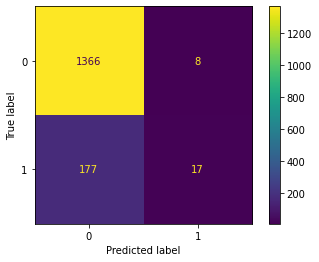

In [ ]:
model_2 = LogisticRegression()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_pred,y_test)))

cm=confusion_matrix(y_test, y_pred)
#(tn, fp, fn, tp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(values_format='d');

**2-Support Vector Machines:** Since the data obtained as a result of this algorithm was insufficient, SMOTE technique was used. With SMOTE (Synthetic Minority Oversampling Technique), new values ​​are created based on the dataset in order to better represent the samples that are few in number. In other words, the data produced is not random, they are there to equalize the representation of different combinations of data. In the second trial, the measurement was made with a sensitivity of 74.04%. A total of 1568 predictions were made, of which 1041 were true negative and 120 were true positive.

Accuracy: 0.7257653061224489


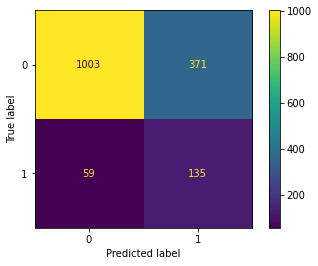

In [ ]:

oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train, y_train.ravel())

X_train=X_train_resh
y_train=y_train_resh

model_2 = SVC(gamma="auto")
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
print("Accuracy: "+str(accuracy_score(y_pred,y_test)))

cm=confusion_matrix(y_test, y_pred)
#(tn, fp, fn, tp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(values_format='d');

#Results
Based on 10 years of precipitation data obtained from many places in Australia, predictions were made about whether it would rain tomorrow. Three different algorithms were used to compare success rates: </br>
• Random Tree</br>
• Logistic Regression</br>
• Support Vector Machines</br>
It can be said that each of the models has an acceptable sensitivity. However, according to the dataset, the operations performed on this dataset and the compared algorithms, it is seen that the Logistic Regression algorithm surpasses the Random Forest with a small value. For this reason, the best algorithm in the study is the Logistic Regression algorithm. According to the results obtained in the analysis of the correlation graph, it is predicted that even more precise estimation can be made if certain data are excluded from the dataset.